In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from random import randint
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
messages=pd.read_csv("sms.csv")

In [3]:
messages.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import string
import nltk.corpus as nl

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in nl.stopwords.words('english')]

## Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [8]:
bow4 = bow_transformer.transform(messages['message'])
print(bow4.shape)


(5572, 11425)


In [9]:
bow4

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [10]:
arr = bow4.toarray()

In [11]:
X = arr
y = messages['label']

In [12]:
import sklearn.model_selection as skmod
X_train, X_test, y_train, y_test = skmod.train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
import sklearn.neural_network as sknn
model = sknn.MLPClassifier(random_state=42) # 1 layer and 100 Neurons

In [14]:
# will take 2-3 minutes
model.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [15]:
y_pred=model.predict(X_test)

In [16]:
import numpy as np

In [17]:
np.mean(y_pred != y_test) # the average error

0.014138118542686243

In [18]:
import sklearn.metrics as skmet

In [19]:
skmet.confusion_matrix(y_test,y_pred)

array([[1593,    0],
       [  26,  220]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [21]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1593    0]
 [  26  220]]


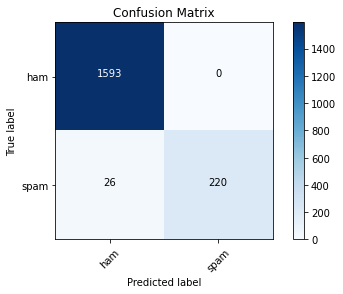

In [22]:
cm_plot_labels = ['ham','spam']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [23]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  1813 correct predictions.
 The result is telling us that we have:  26 incorrect predictions.
 We have a total predictions of:  1839


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       1.00      0.89      0.94       246

    accuracy                           0.99      1839
   macro avg       0.99      0.95      0.97      1839
weighted avg       0.99      0.99      0.99      1839



In [25]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Neural Network model: 98.59%


In [26]:
#calculate Precision
print("Precision of the Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred, average="binary", pos_label="spam")))

Precision of the Neural Network model: 100.00%


In [27]:
#calculate Recall
print("Recall of the Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred, average="binary", pos_label="spam")))

Recall of the Neural Network model: 89.43%


In [28]:
# try with small hidden layer size (not 100) to see what happens

In [33]:
import sklearn.neural_network as sknn
model1 = sknn.MLPClassifier(hidden_layer_sizes=10, random_state=42) 
model1.fit(X_train,y_train)
y_pred1=model.predict(X_test)
np.mean(y_pred1 != y_test)

0.014138118542686243